In [1]:
%pip install tensorflow pandas numpy scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten, GRU
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [3]:

# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [4]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("D:/Thái/Phân tích thống kê/Silver_data_filtered.csv")

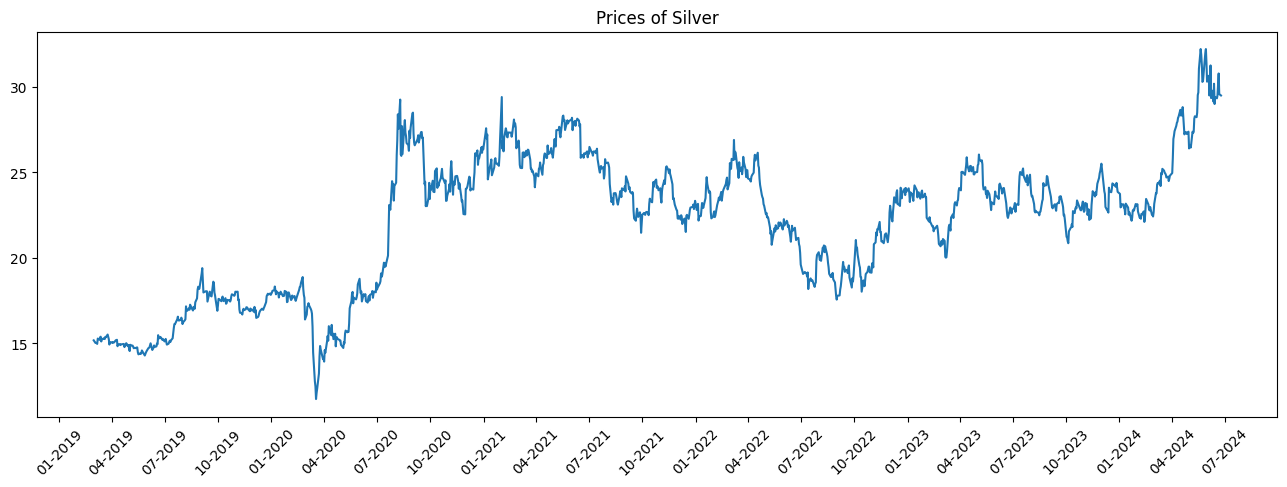

In [5]:
# Format column Date
df.index = pd.to_datetime(df.date,format='%m/%d/%Y')

# Flip the column
#df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'close' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Silver')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45) 

plt.show()

Split dataset (7-2-1)

In [6]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [7]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [8]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [9]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.15605, saving model to save_model_7_2_1.keras
19/19 - 16s - 864ms/step - loss: 0.1560
Epoch 2/80

Epoch 2: loss improved from 0.15605 to 0.05224, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0522
Epoch 3/80

Epoch 3: loss improved from 0.05224 to 0.02677, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0268
Epoch 4/80

Epoch 4: loss did not improve from 0.02677
19/19 - 0s - 14ms/step - loss: 0.0283
Epoch 5/80

Epoch 5: loss improved from 0.02677 to 0.02394, saving model to save_model_7_2_1.keras
19/19 - 0s - 20ms/step - loss: 0.0239
Epoch 6/80

Epoch 6: loss improved from 0.02394 to 0.02313, saving model to save_model_7_2_1.keras
19/19 - 0s - 18ms/step - loss: 0.0231
Epoch 7/80

Epoch 7: loss did not improve from 0.02313
19/19 - 0s - 15ms/step - loss: 0.0239
Epoch 8/80

Epoch 8: loss did not improve from 0.02313
19/19 - 0s - 16ms/step - loss: 0.0235
Epoch 9/80

Epoch 9: loss improved fro

In [10]:

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [11]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [12]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [13]:
# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [14]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [15]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8619560599327087], [0.8593211770057678], [0.8571798205375671], [0.8537680506706238], [0.8502949476242065], [0.8468042016029358], [0.8433946967124939], [0.8400537371635437], [0.8367484211921692], [0.8334733247756958], [0.8302263617515564], [0.8270089030265808], [0.8238210082054138], [0.8206620216369629], [0.8175311088562012], [0.8144277334213257], [0.811351478099823], [0.8083014488220215], [0.8052772879600525], [0.8022785782814026], [0.7993043065071106], [0.7963544130325317], [0.7934281826019287], [0.790524959564209], [0.7876445651054382], [0.7847864627838135], [0.7819501757621765], [0.7791353464126587], [0.7763412594795227], [0.7735679149627686]]


In [16]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [17]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.37924055]
 [29.32530449]
 [29.28147093]
 [29.211632  ]
 [29.14053758]
 [29.06908201]
 [28.99928944]
 [28.9309    ]
 [28.86324018]
 [28.79619896]
 [28.72973363]
 [28.66387224]
 [28.59861604]
 [28.53395158]
 [28.4698618 ]
 [28.4063357 ]
 [28.34336476]
 [28.28093066]
 [28.21902608]
 [28.1576425 ]
 [28.09675915]
 [28.03637483]
 [27.9764749 ]
 [27.91704592]
 [27.85808425]
 [27.79957889]
 [27.7415201 ]
 [27.68390054]
 [27.62670558]
 [27.56993522]]


Margin of Error: 1.0756785019585882
Lower Bound of Future Prediction: [[28.30356204]
 [28.24962599]
 [28.20579242]
 [28.1359535 ]
 [28.06485908]
 [27.9934035 ]
 [27.92361094]
 [27.8552215 ]
 [27.78756168]
 [27.72052046]
 [27.65405512]
 [27.58819374]
 [27.52293754]
 [27.45827308]
 [27.3941833 ]
 [27.3306572 ]
 [27.26768625]
 [27.20525216]
 [27.14334758]
 [27.081964  ]
 [27.02108065]
 [26.96069633]
 [26.9007964 ]
 [26.84136742]
 [26.78240575]
 [26.72390039]
 [26.6658416 ]
 [26.60822204]
 [26.55102708]
 [26.49425672]]
Upper Bound of Future Prediction: [[30.45491905]
 [30.400983  ]
 [30.35714943]
 [30.2873105 ]
 [30.21621608]
 [30.14476051]
 [30.07496794]
 [30.0065785 ]
 [29.93891868]
 [29.87187746]
 [29.80541213]
 [29.73955075]
 [29.67429454]
 [29.60963008]
 [29.5455403 ]
 [29.48201421]
 [29.41904326]
 [29.35660916]
 [29.29470459]
 [29.233321  ]
 [29.17243766]
 [29.11205334]
 [29.0521534 ]
 [28.99272442]
 [28.93376275]
 [28.8752574 ]
 [28.8171986 ]
 [28.75957904]
 [28.70238408]
 [28.64561

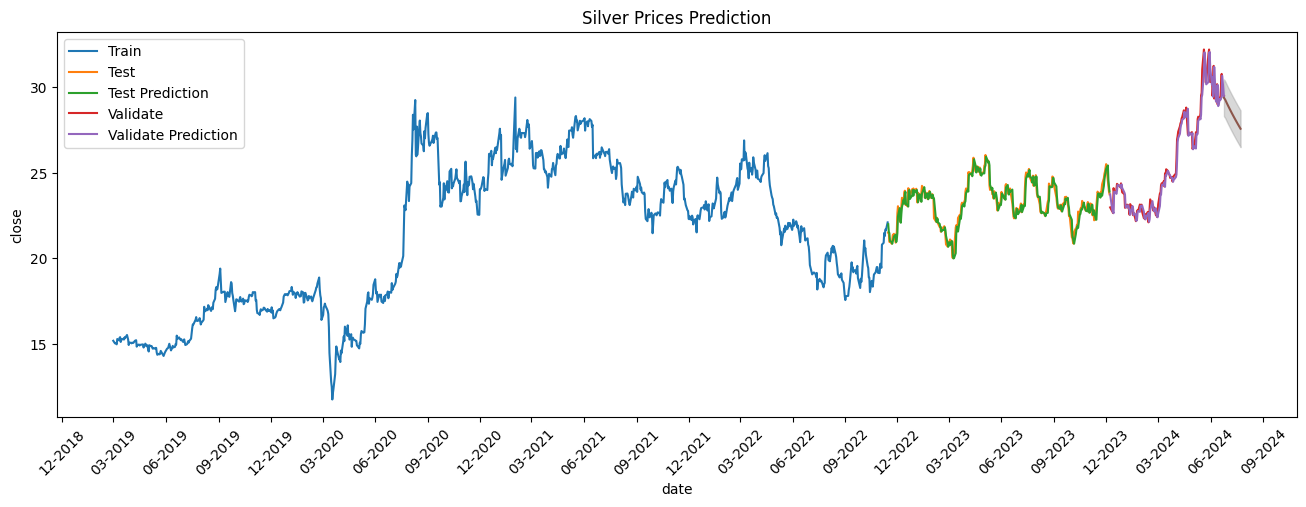

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()


In [19]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.2986642216028792
MAPE:  1.2847880947006376
RMSE:  0.3932864139687725

** Validate **
MAE:  0.3814576274730539
MAPE:  1.4238049176174514
RMSE:  0.5568819664517205


Split dataset (6-3-1)

In [20]:
# Split the data
train_size = int(0.6 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [21]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [22]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [23]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.22167, saving model to save_model_6_3_1.keras
16/16 - 16s - 1s/step - loss: 0.2217
Epoch 2/80

Epoch 2: loss improved from 0.22167 to 0.08180, saving model to save_model_6_3_1.keras
16/16 - 1s - 31ms/step - loss: 0.0818
Epoch 3/80

Epoch 3: loss improved from 0.08180 to 0.03200, saving model to save_model_6_3_1.keras
16/16 - 0s - 26ms/step - loss: 0.0320
Epoch 4/80

Epoch 4: loss improved from 0.03200 to 0.02603, saving model to save_model_6_3_1.keras
16/16 - 0s - 29ms/step - loss: 0.0260
Epoch 5/80

Epoch 5: loss improved from 0.02603 to 0.02458, saving model to save_model_6_3_1.keras
16/16 - 0s - 24ms/step - loss: 0.0246
Epoch 6/80

Epoch 6: loss improved from 0.02458 to 0.02397, saving model to save_model_6_3_1.keras
16/16 - 0s - 27ms/step - loss: 0.0240
Epoch 7/80

Epoch 7: loss improved from 0.02397 to 0.02381, saving model to save_model_6_3_1.keras
16/16 - 0s - 27ms/step - loss: 0.0238
Epoch 8/80

Epoch 8: loss improved from 0.0238

In [24]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)
     

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [25]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [26]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [27]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [28]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [29]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8758919835090637], [0.8875961899757385], [0.8993113040924072], [0.9092793464660645], [0.9188289046287537], [0.9283721446990967], [0.9380318522453308], [0.9477788805961609], [0.9575563669204712], [0.9673420786857605], [0.9771287441253662], [0.9869137406349182], [0.9966933727264404], [1.0064617395401], [1.016211986541748], [1.0259379148483276], [1.0356320142745972], [1.0452880859375], [1.0548990964889526], [1.0644583702087402], [1.0739588737487793], [1.0833934545516968], [1.092755675315857], [1.1020383834838867], [1.1112343072891235], [1.1203372478485107], [1.129340410232544], [1.1382371187210083], [1.1470215320587158], [1.1556874513626099]]


In [30]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.6645089 ]
 [29.90409401]
 [30.14390239]
 [30.34794822]
 [30.54342768]
 [30.7387778 ]
 [30.93651202]
 [31.13603369]
 [31.33617883]
 [31.53649235]
 [31.73682539]
 [31.93712427]
 [32.13731334]
 [32.33727181]
 [32.53685936]
 [32.73594912]
 [32.93438733]
 [33.13204712]
 [33.32878451]
 [33.52446284]
 [33.71893815]
 [33.91206401]
 [34.10370867]
 [34.29372571]
 [34.48196627]
 [34.66830346]
 [34.8525982 ]
 [35.03471382]
 [35.21453076]
 [35.39192213]]


Margin of Error: 3.340475697976624
Lower Bound of Future Prediction: [[26.3240332 ]
 [26.56361831]
 [26.8034267 ]
 [27.00747252]
 [27.20295198]
 [27.3983021 ]
 [27.59603632]
 [27.79555799]
 [27.99570313]
 [28.19601665]
 [28.39634969]
 [28.59664857]
 [28.79683764]
 [28.99679611]
 [29.19638367]
 [29.39547342]
 [29.59391163]
 [29.79157142]
 [29.98830881]
 [30.18398714]
 [30.37846245]
 [30.57158832]
 [30.76323298]
 [30.95325001]
 [31.14149057]
 [31.32782777]
 [31.5121225 ]
 [31.69423812]
 [31.87405506]
 [32.05144643]]
Upper Bound of Future Prediction: [[33.0049846 ]
 [33.24456971]
 [33.48437809]
 [33.68842392]
 [33.88390338]
 [34.0792535 ]
 [34.27698771]
 [34.47650938]
 [34.67665453]
 [34.87696805]
 [35.07730109]
 [35.27759997]
 [35.47778904]
 [35.67774751]
 [35.87733506]
 [36.07642481]
 [36.27486303]
 [36.47252282]
 [36.6692602 ]
 [36.86493854]
 [37.05941384]
 [37.25253971]
 [37.44418437]
 [37.63420141]
 [37.82244197]
 [38.00877916]
 [38.1930739 ]
 [38.37518952]
 [38.55500646]
 [38.732397

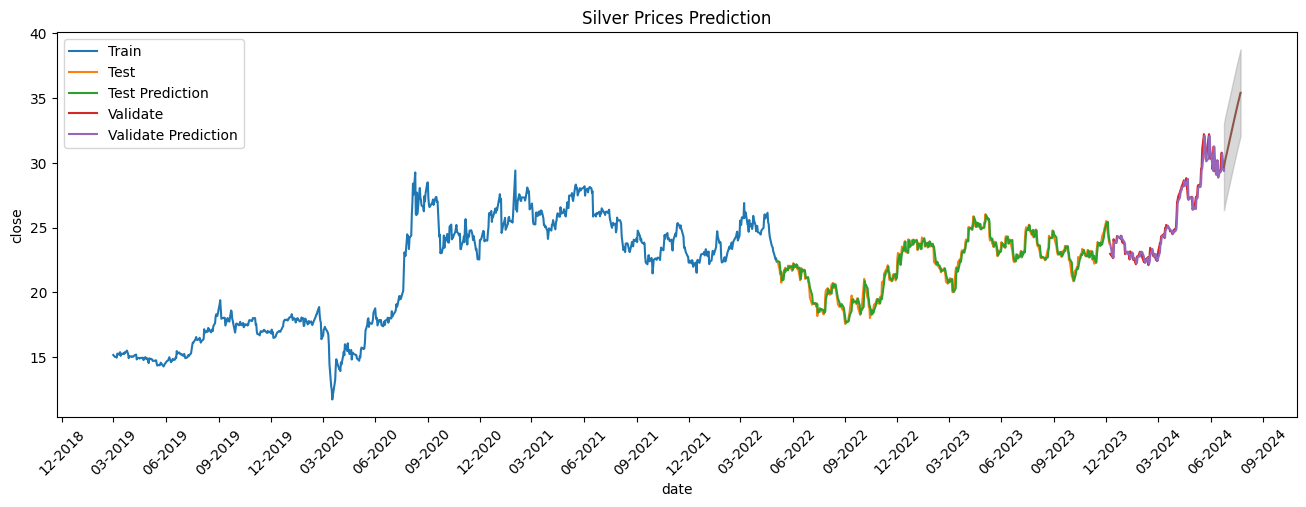

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()



In [32]:

evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.30558884721028245
MAPE:  1.3922788112684028
RMSE:  0.40307785652203515

** Validate **
MAE:  0.38172757805718294
MAPE:  1.4252451443902903
RMSE:  0.5570398438316343


Split dataset (5-3-2)

In [33]:
# Split the data
train_size = int(0.5 * len(sc_train))
test_size = int(0.3 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [34]:

# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(5, len(train_data)):
    # Append the last 5 values to the x_train array
    x_train.append(sc_train[i-5:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [35]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [36]:
# Build the model
model = Sequential()

# Add an GRU layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an GRU layer with 50 units
model.add(GRU(50,return_sequences=True))

# Add an GRU layer with 50 units
model.add(GRU(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

c:\Users\tpc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80

Epoch 1: loss improved from inf to 0.23970, saving model to save_model_5_3_2.keras
14/14 - 16s - 1s/step - loss: 0.2397
Epoch 2/80

Epoch 2: loss improved from 0.23970 to 0.09189, saving model to save_model_5_3_2.keras
14/14 - 0s - 25ms/step - loss: 0.0919
Epoch 3/80

Epoch 3: loss improved from 0.09189 to 0.04022, saving model to save_model_5_3_2.keras
14/14 - 0s - 25ms/step - loss: 0.0402
Epoch 4/80

Epoch 4: loss improved from 0.04022 to 0.02977, saving model to save_model_5_3_2.keras
14/14 - 0s - 30ms/step - loss: 0.0298
Epoch 5/80

Epoch 5: loss improved from 0.02977 to 0.02334, saving model to save_model_5_3_2.keras
14/14 - 0s - 26ms/step - loss: 0.0233
Epoch 6/80

Epoch 6: loss did not improve from 0.02334
14/14 - 0s - 17ms/step - loss: 0.0242
Epoch 7/80

Epoch 7: loss did not improve from 0.02334
14/14 - 0s - 18ms/step - loss: 0.0241
Epoch 8/80

Epoch 8: loss did not improve from 0.02334
14/14 - 0s - 18ms/step - loss: 0.0239
Epoch 9/80

Epoch 9: loss improved from 0

In [37]:
# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


In [38]:
# Preprocess the test data
test = df1[len(train_data)-5:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(5, test.shape[0]):
    x_test.append(sc_test[i-5:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [39]:
# Preprocess the validate data
val = df1[train_size+test_size-5:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(5, val.shape[0]):
    x_val.append(sc_val[i-5:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values
  

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [40]:

# Forecast of test and val data
train_predict=model.predict(x_train)
y_pred=model.predict(x_test)
y_pred_val=model.predict(x_val)

# Standardization of y_pred and y_pred_val data
train_predict=sc.inverse_transform(train_predict)
y_pred=sc.inverse_transform(y_pred)
y_pred_val=sc.inverse_transform(y_pred_val)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [41]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 5:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 5)
[0.8593063019052272, 0.8680996580361506, 0.9301905227161702, 0.8714215925744995, 0.8673180263800686]


In [42]:
# Initialize variables
lst_output = []
n_steps = 5
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 5):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8623722791671753], [0.8596807718276978], [0.8572826385498047], [0.8530644774436951], [0.8488330841064453], [0.8447842597961426], [0.8409750461578369], [0.8373262286186218], [0.8337566256523132], [0.8302596807479858], [0.8268417119979858], [0.8235079646110535], [0.8202574253082275], [0.8170861601829529], [0.8139906525611877], [0.8109681606292725], [0.8080165982246399], [0.8051334619522095], [0.8023169040679932], [0.7995650172233582], [0.796875536441803], [0.7942465543746948], [0.7916763424873352], [0.78916335105896], [0.7867057919502258], [0.7843017578125], [0.781950056552887], [0.779649019241333], [0.7773973345756531], [0.7751935720443726]]


In [43]:

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[29.38776055]
 [29.3326654 ]
 [29.28357561]
 [29.19722985]
 [29.11061323]
 [29.0277338 ]
 [28.94975919]
 [28.8750679 ]
 [28.80199813]
 [28.73041566]
 [28.66044984]
 [28.59220804]
 [28.5256695 ]
 [28.4607537 ]
 [28.39738866]
 [28.33551825]
 [28.27509977]
 [28.21608197]
 [28.15842703]
 [28.1020959 ]
 [28.04704223]
 [27.99322697]
 [27.94061473]
 [27.8891738 ]
 [27.83886756]
 [27.78965698]
 [27.74151766]
 [27.69441542]
 [27.64832344]
 [27.60321242]]


Margin of Error: 1.0647120815914535
Lower Bound of Future Prediction: [[28.32304847]
 [28.26795332]
 [28.21886353]
 [28.13251777]
 [28.04590115]
 [27.96302172]
 [27.88504711]
 [27.81035582]
 [27.73728605]
 [27.66570358]
 [27.59573776]
 [27.52749595]
 [27.46095741]
 [27.39604162]
 [27.33267658]
 [27.27080617]
 [27.21038768]
 [27.15136988]
 [27.09371494]
 [27.03738382]
 [26.98233015]
 [26.92851489]
 [26.87590265]
 [26.82446171]
 [26.77415548]
 [26.7249449 ]
 [26.67680558]
 [26.62970334]
 [26.58361136]
 [26.53850034]]
Upper Bound of Future Prediction: [[30.45247264]
 [30.39737748]
 [30.34828769]
 [30.26194193]
 [30.17532531]
 [30.09244588]
 [30.01447128]
 [29.93977998]
 [29.86671021]
 [29.79512775]
 [29.72516193]
 [29.65692012]
 [29.59038158]
 [29.52546578]
 [29.46210074]
 [29.40023033]
 [29.33981185]
 [29.28079405]
 [29.22313911]
 [29.16680798]
 [29.11175431]
 [29.05793905]
 [29.00532681]
 [28.95388588]
 [28.90357964]
 [28.85436906]
 [28.80622974]
 [28.75912751]
 [28.71303552]
 [28.66792

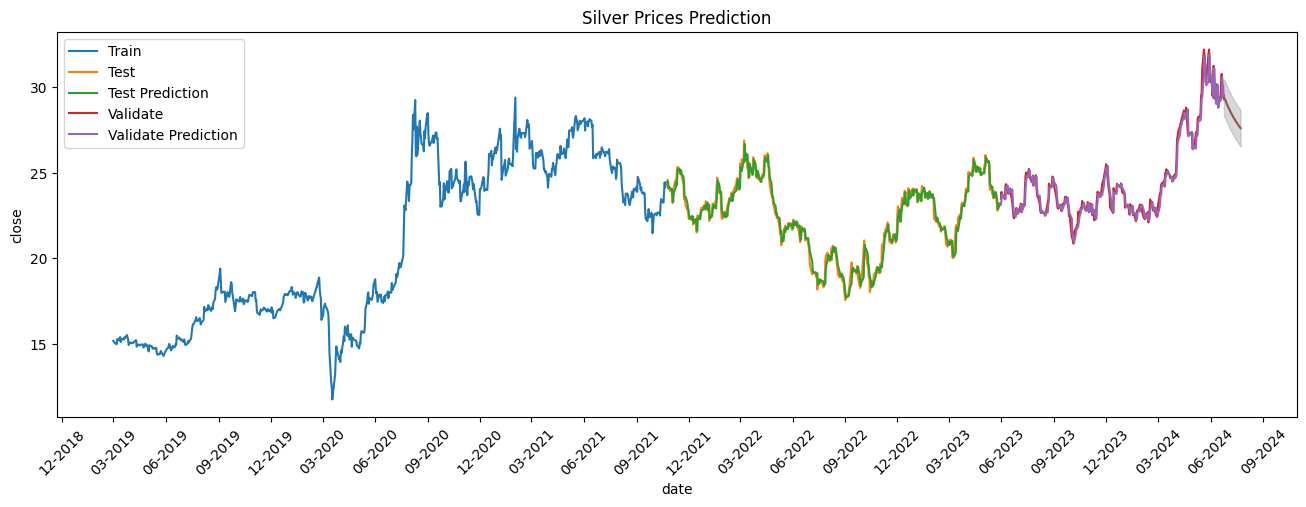

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index, train_data.close)
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)
plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('date')
plt.ylabel('close')
plt.title('Silver Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# x-axis format to show only the year
from matplotlib.dates import DateFormatter, MonthLocator
ax = plt.gca()
ax.xaxis.set_major_formatter(DateFormatter('%m-%Y'))  
ax.xaxis.set_major_locator(MonthLocator(interval=3))
plt.xticks(rotation=45)  
plt.show()



In [45]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  0.3226893294945619
MAPE:  1.453342771616202
RMSE:  0.4221262726040047

** Validate **
MAE:  0.345627019113569
MAPE:  1.3705456118326527
RMSE:  0.4822029172472548
